# <font color='Lime'> Seoul Bike Sharing Demand Prediction. </font>

[**<font color='Coral'>GitHub Link</font>**](https://github.com/Akshay-Jadhav-AJ/Data_Science_proj.git)

## <font color='Blue'> Import Packages </font>

In [1]:
# import the pandas and numpy
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import matplotlib
import matplotlib
%matplotlib inline 
#matplotlib.style.use('ggplot') # Style Formatting of main graph

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## <font color='Blue'> Load Data </font>

In [2]:
data_path= r"C://Users//Akshay//Documents//Project//SeoulBikeData.csv"
df = pd.read_csv(data_path, encoding = "unicode_escape")
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
df.shape

(8760, 14)

In [4]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## <font color='Blue'> Data Information. </font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.describe(include="all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

## <font color='Blue'> Check Null Values. </font>

In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [10]:
df["Weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.drop("Date", axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

In [12]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day   Weekday  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

   Day  Month  Year  
0   12      1  2017  
1   12      1  2017  
2   12      1  2017  
3   12      1  2017  
4   12      1  2017

## <font color='Blue'> EDA </font>

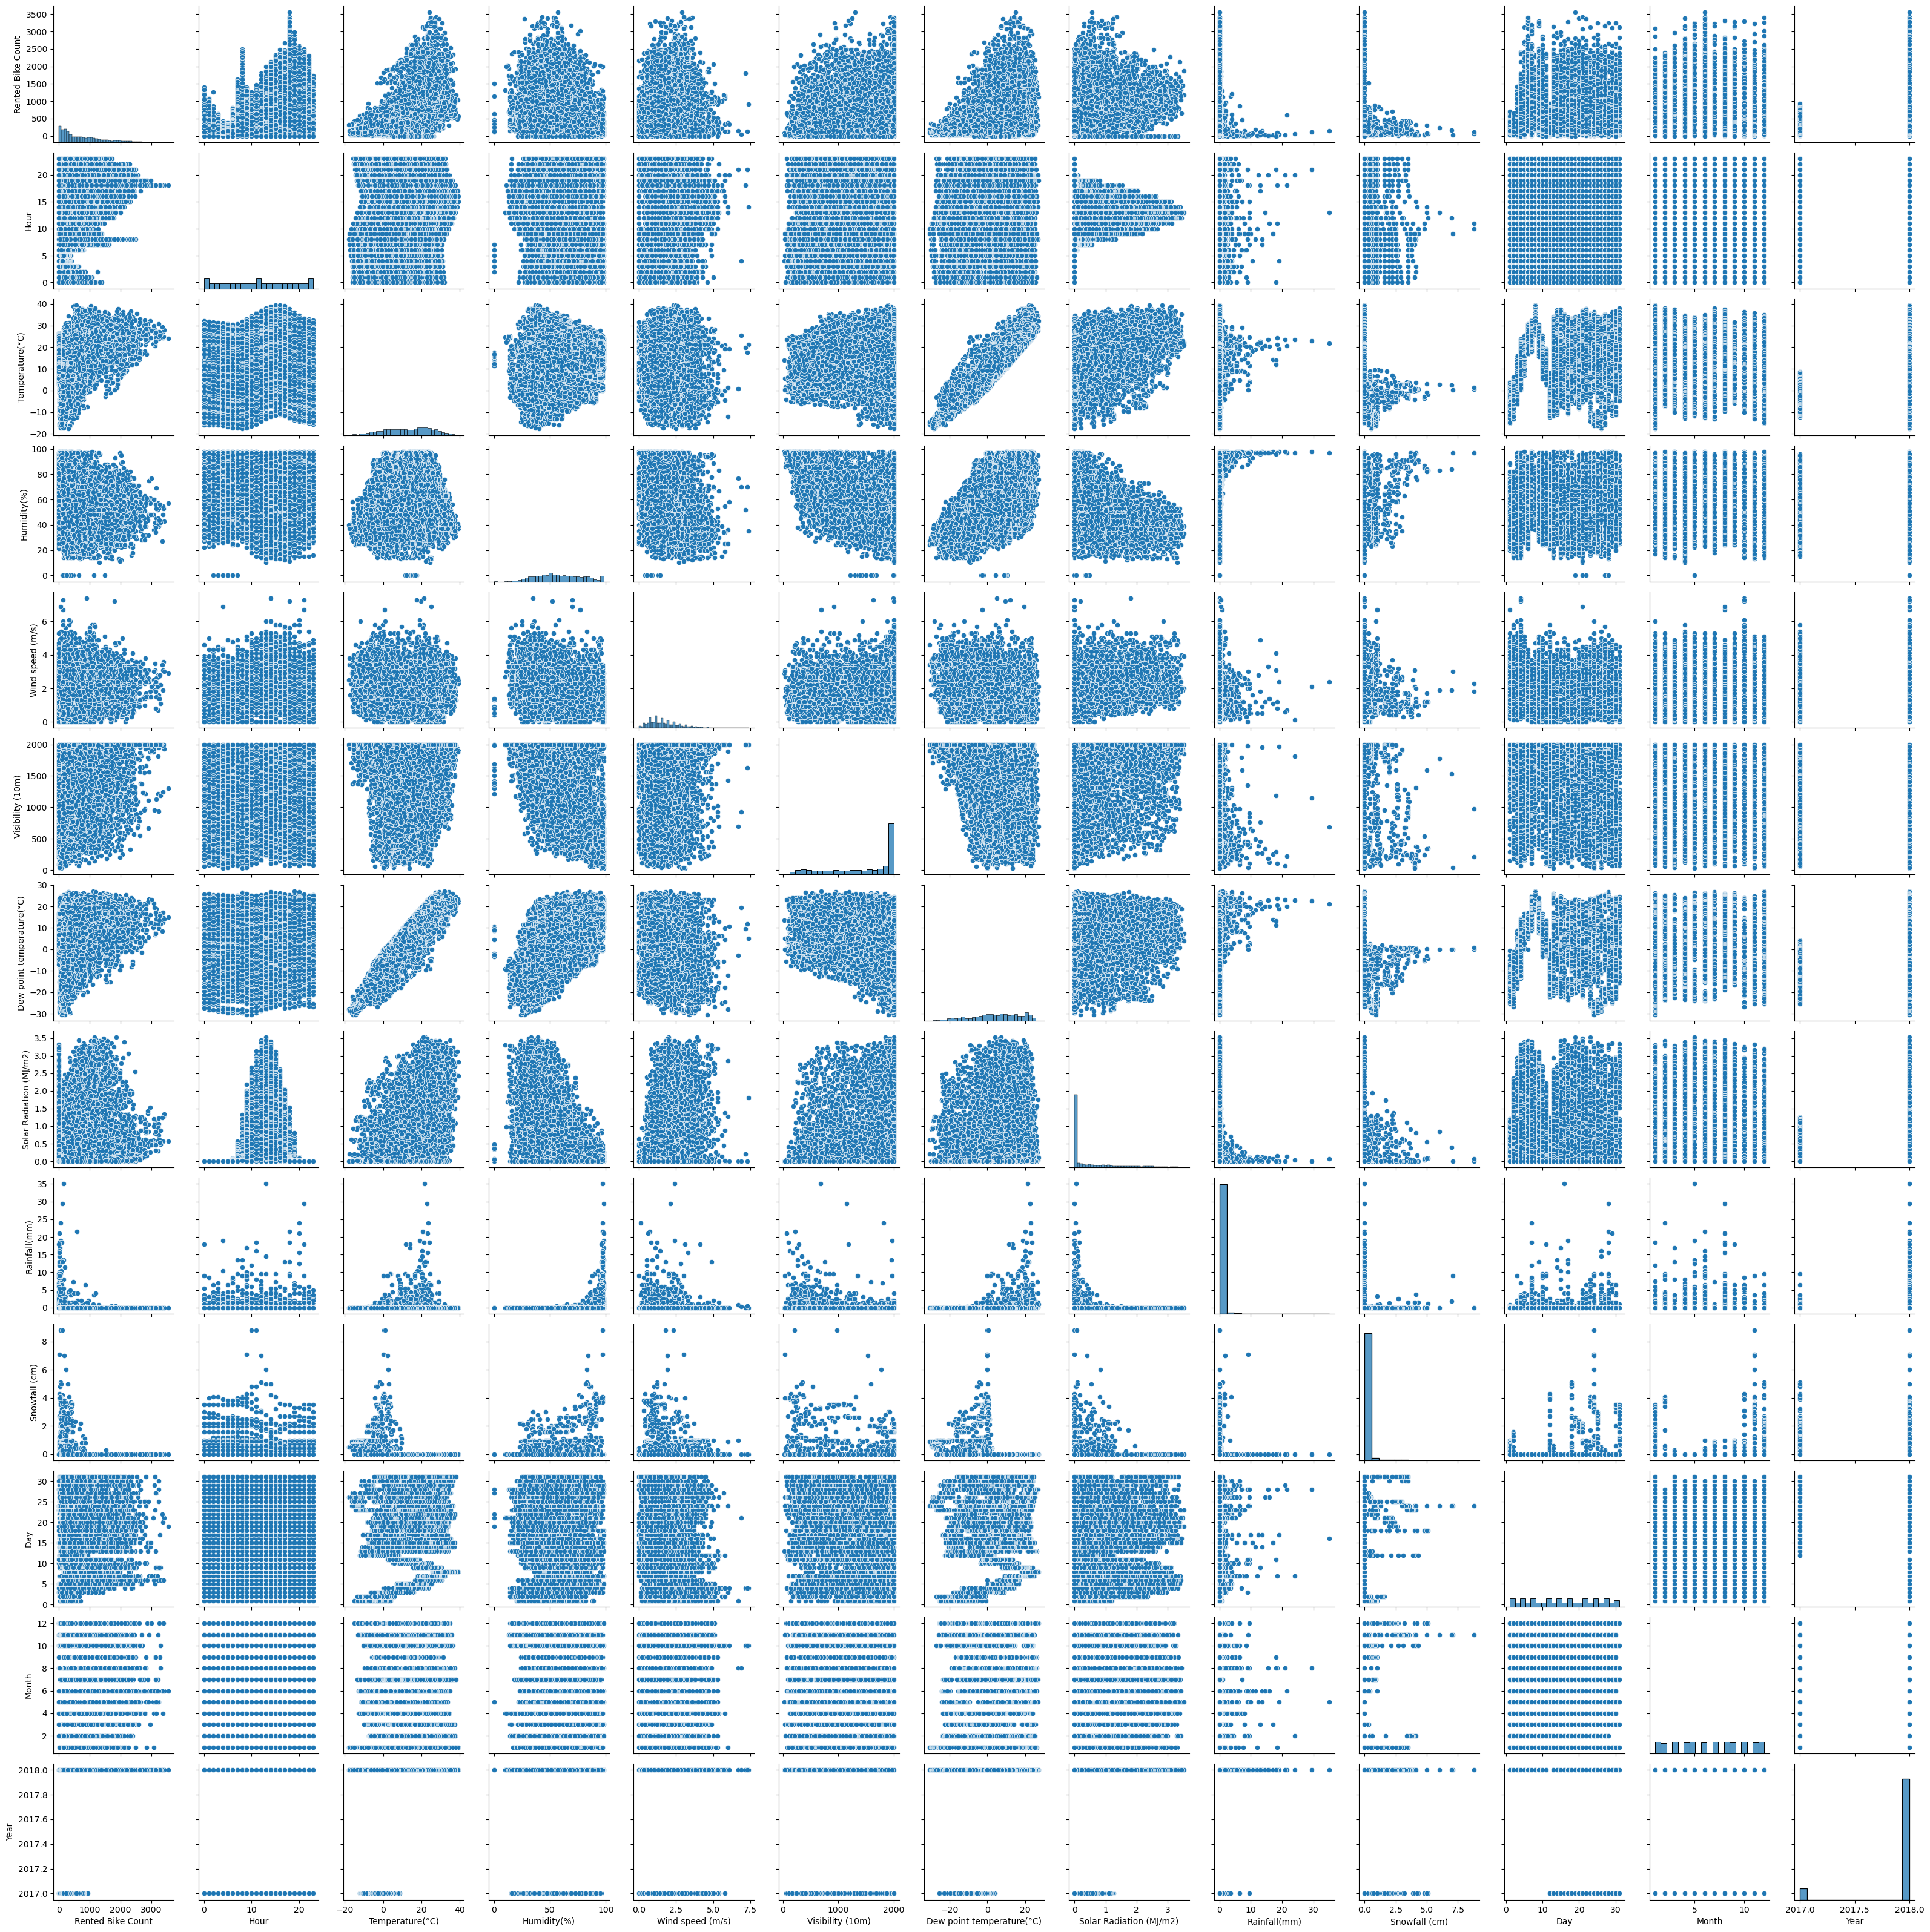

In [13]:
sns.pairplot(df)

We have two features that have given us the same insights: `snowfall` and `Rainfall`.  

Whenever heavy rainfall happens, the demand for bikes decreases. And whenever light or no rainfall happens, the demand for bikes increases. The same thing happens with the snowfall.  
So we can conclude that we got the same result from both features.  
So we can use one feature for model building.

Most people do not prefer riding bikes when visibility is low, the wind speed is high, and radiation is high.  
`From 7 to 9 a.m.` in the morning and `from 3 to 10 p.m.`, there is more demand for bikes.  
Also, we observed that Bike demand is highest at 7 p.m.  

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

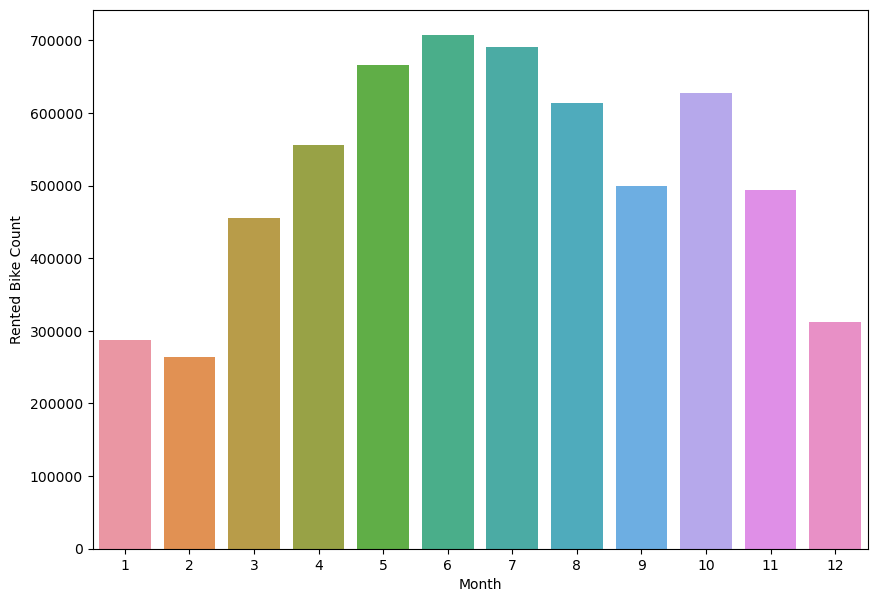

In [14]:
plt.figure (figsize=(10,7))
Month = df.groupby("Month").sum().reset_index()
sns.barplot(x='Month', y='Rented Bike Count', data=Month)

<AxesSubplot:xlabel='Day', ylabel='Rented Bike Count'>

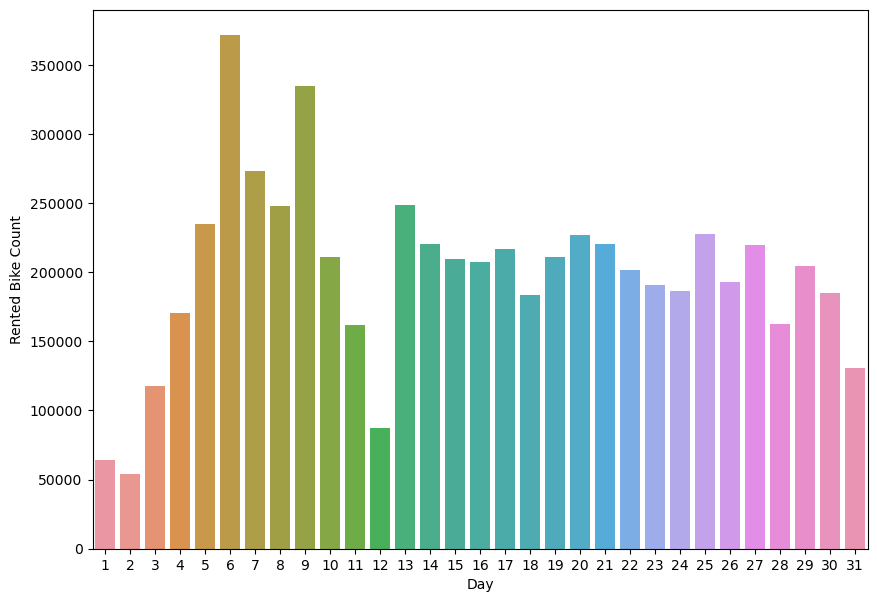

In [15]:
plt.figure (figsize=(10,7))
Day = df.groupby("Day").sum().reset_index()
sns.barplot(x='Day', y='Rented Bike Count', data=Day)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

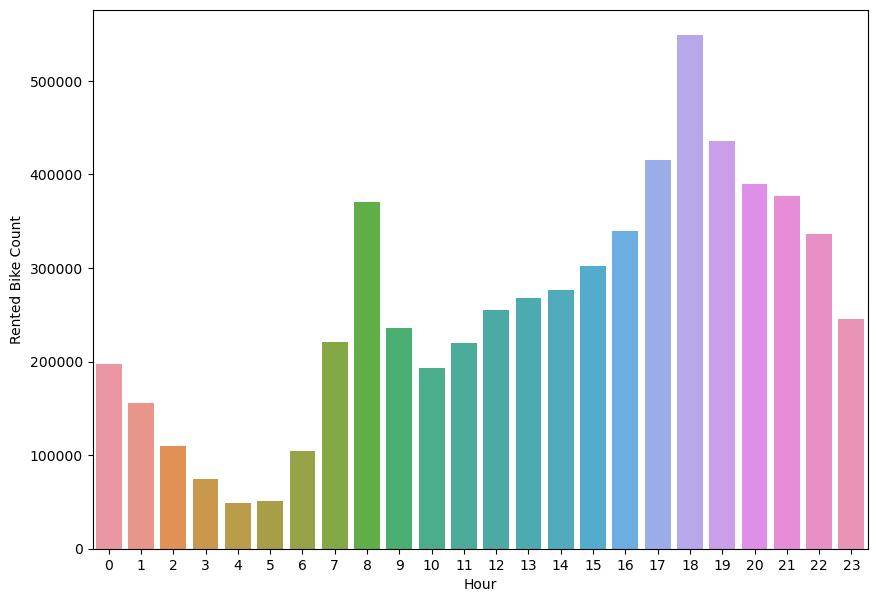

In [16]:
plt.figure (figsize=(10,7))
Hours = df.groupby("Hour").sum().reset_index()
sns.barplot(x='Hour', y='Rented Bike Count', data=Hours)

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

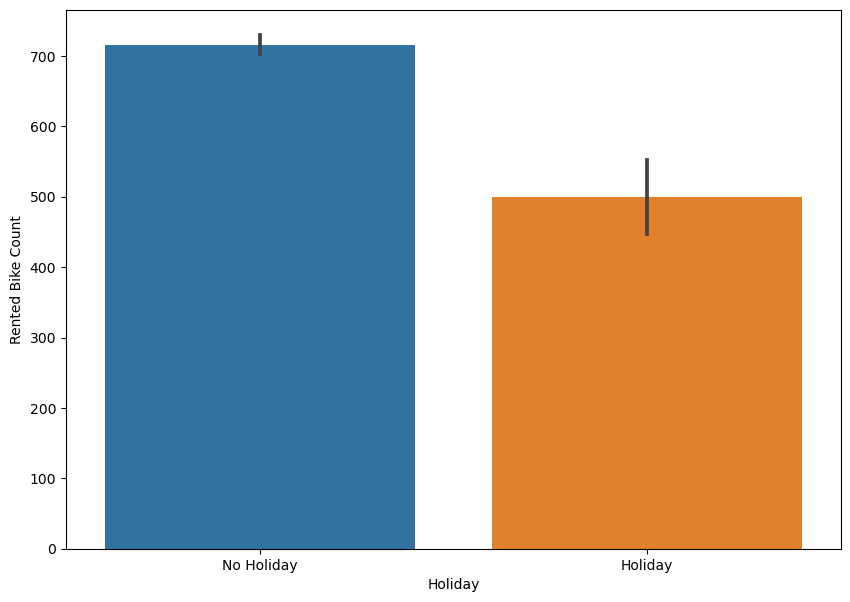

In [17]:
plt.figure (figsize=(10,7))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df)

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

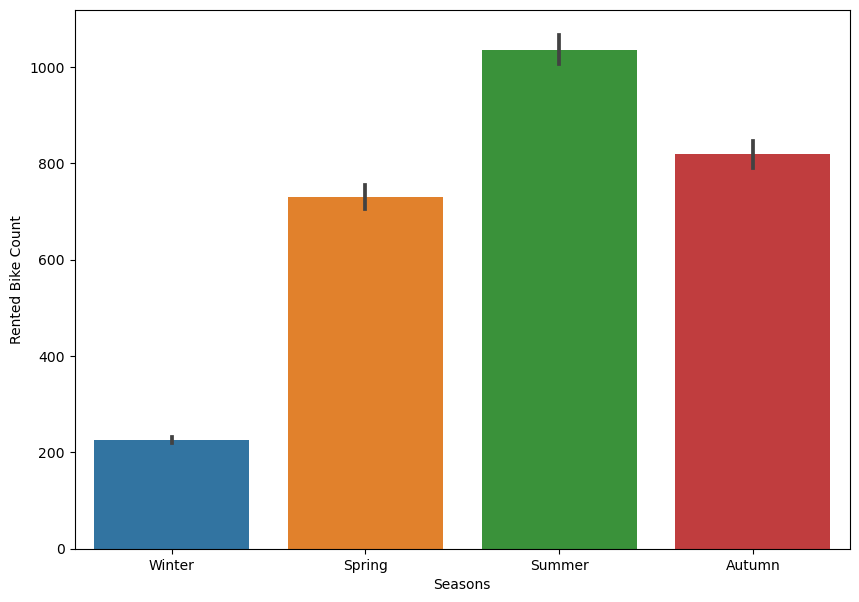

In [18]:
plt.figure (figsize=(10,7))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df)

<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

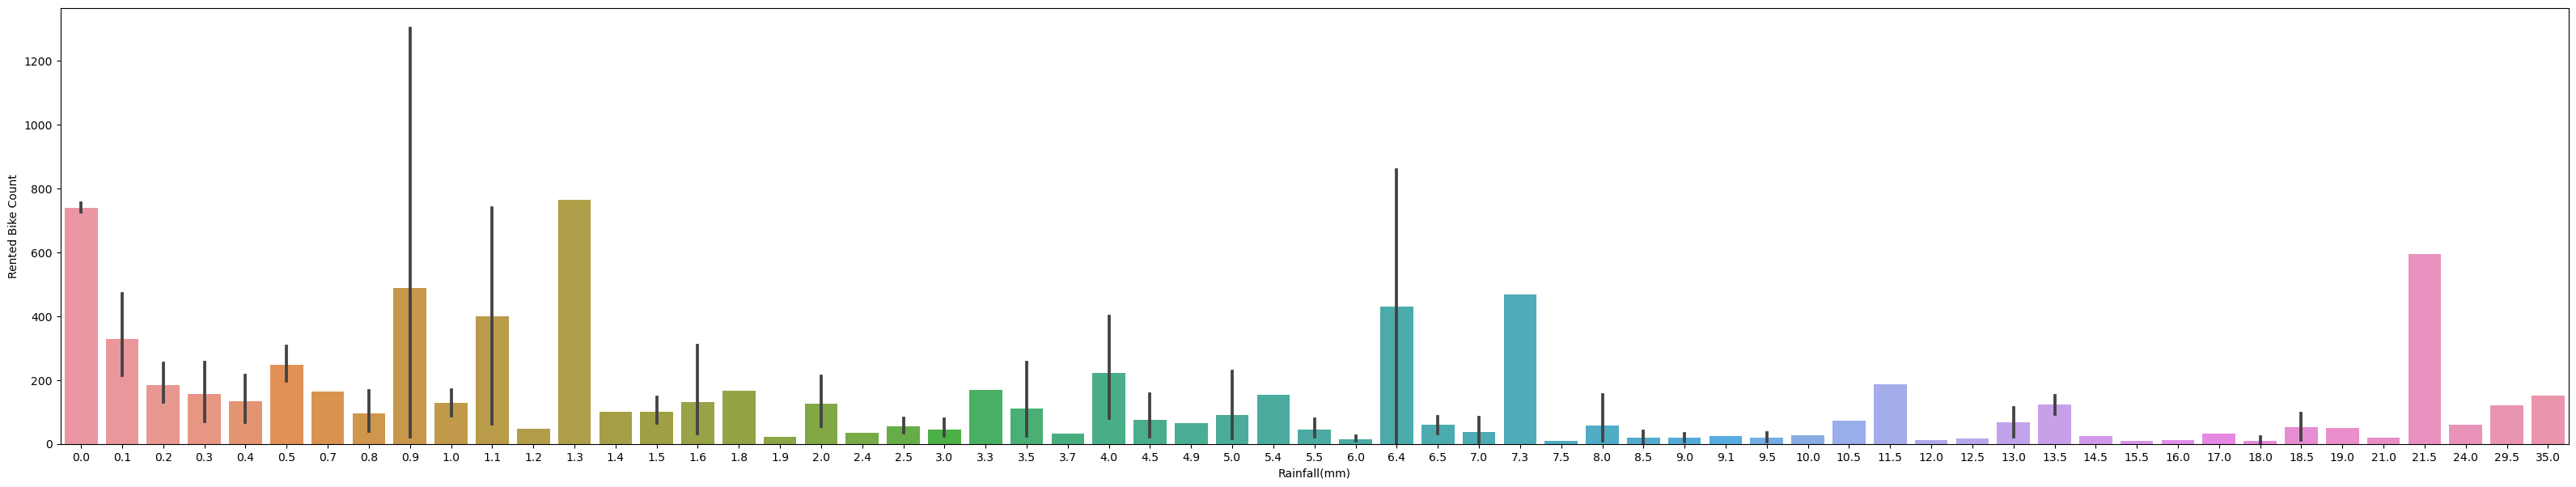

In [19]:
plt.figure (figsize=(40,7))
sns.barplot(x='Rainfall(mm)', y='Rented Bike Count', data=df)

<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

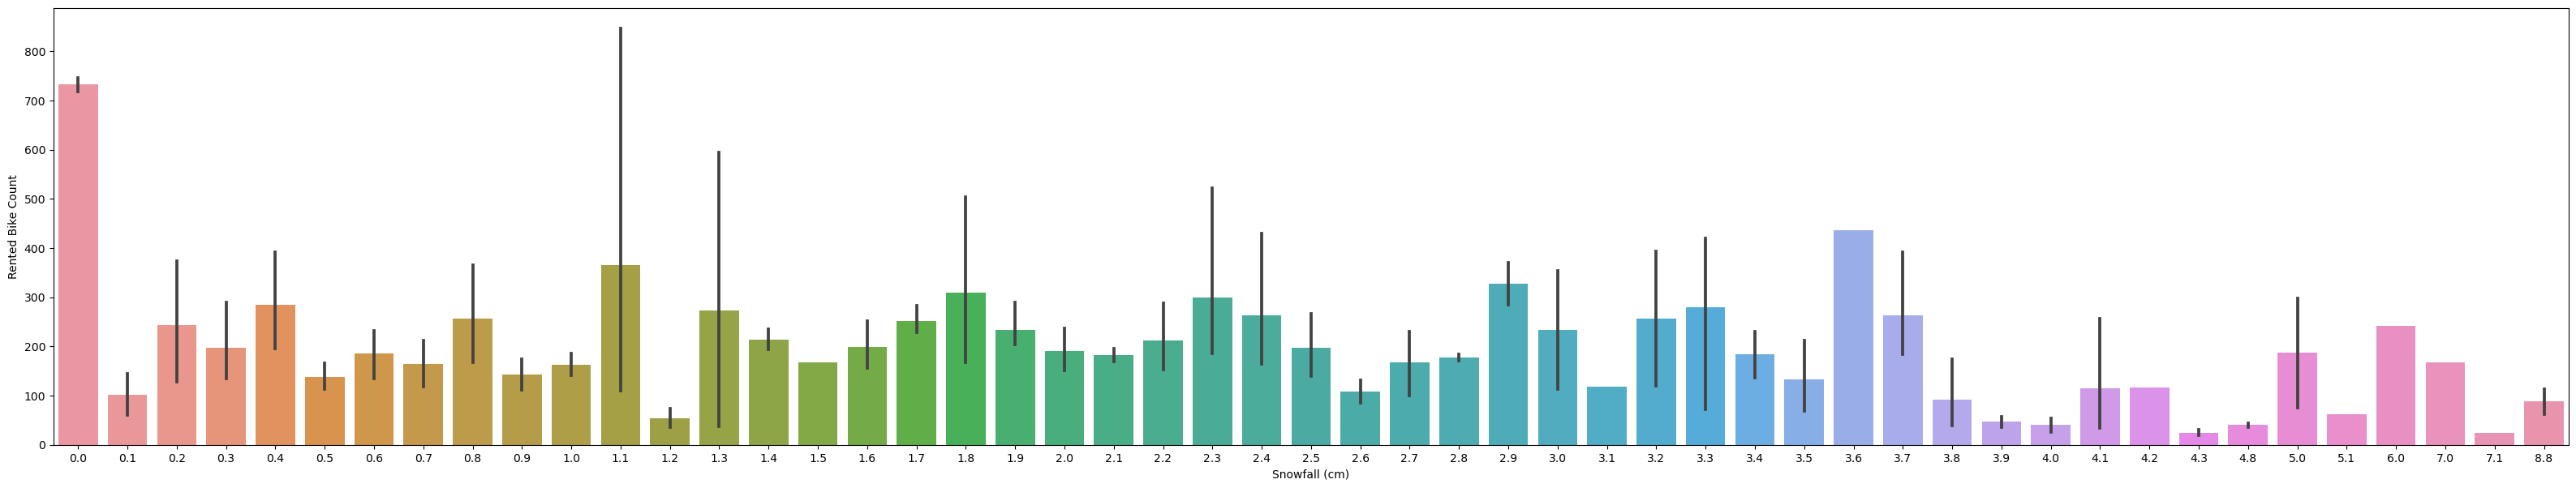

In [20]:
plt.figure (figsize=(40,7))
sns.barplot(x='Snowfall (cm)', y='Rented Bike Count', data=df)

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

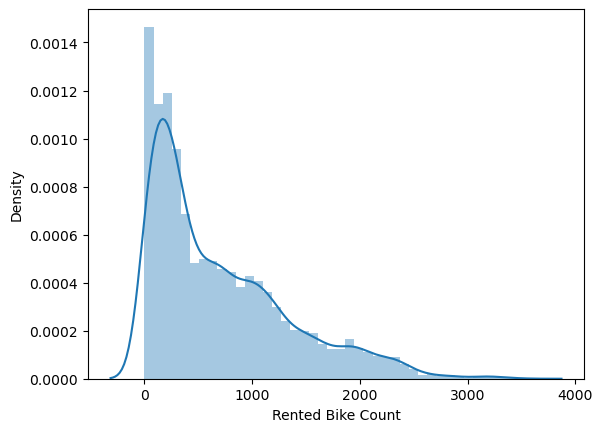

In [21]:
#plt.figure (figsize=(40,7))
sns.distplot(df["Rented Bike Count"])

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

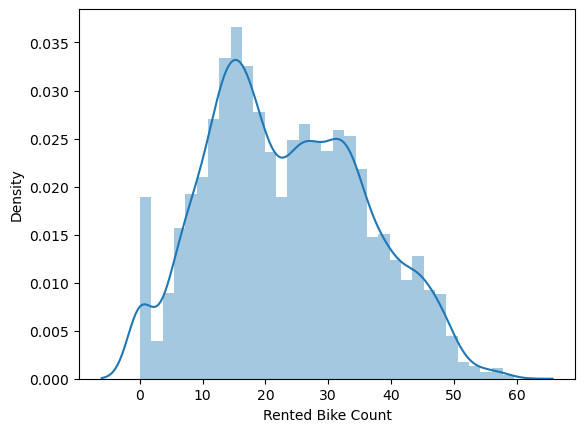

In [22]:
# Normaly Distributed:

sns.distplot(np.sqrt(df["Rented Bike Count"]))

## <font color='Blue'> Skewed Data </font>

In [23]:
df.skew().sort_values(ascending=True)

Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

## <font color='Blue'> Remove Multicollinearity </font>

<AxesSubplot:>

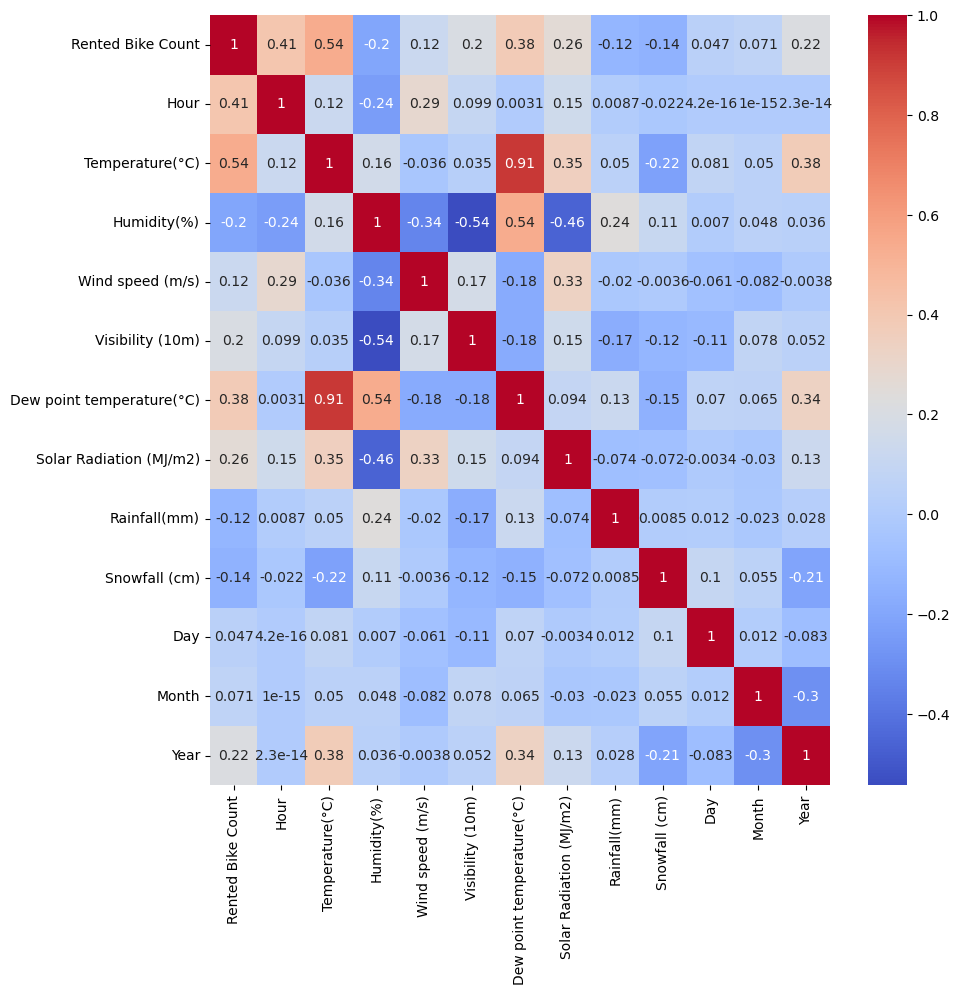

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

In [25]:
# variance inflation factors (VIF)

def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range (df.shape[1])]
    
    return vif

In [26]:
not_for_vif = ["Day", "Month", "Year", "Rented Bike Count"]

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                       Hour   4.418242
1            Temperature(°C)  33.385256
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
4           Visibility (10m)   9.085977
5  Dew point temperature(°C)  17.126199
6    Solar Radiation (MJ/m2)   2.881590
7               Rainfall(mm)   1.081567
8              Snowfall (cm)   1.120833

In [27]:
df.drop(["Dew point temperature(°C)"], axis=1, inplace=True)

## <font color='Blue'> Encoding </font>

In [28]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day   Weekday  Day  Month  Year  
0  Winter  No Holiday             Yes  Thursday   12      1  2017  
1  Winter  No Holiday             Yes  Thursday   12      1  2017  
2  Winter  No Holiday             Yes  Thursday   12      1  2017  
3  Winter  No Holiday             Yes  Thursday   12      1  2017  
4  Winter  No Holiday             Yes  Thursday   12      1  2017

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [30]:
cat_features = ["Seasons", "Holiday", "Functioning Day", "Weekday"]

In [31]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [32]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [33]:
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [34]:
df["Weekday"].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Weekday, dtype: int64

In [35]:
df["Holiday"] = df["Holiday"].map({"No Holiday":0, "Holiday":1})
df["Functioning Day"] = df["Functioning Day"].map({"No":0, "Yes":1})

In [36]:
df_seasons = pd.get_dummies(df["Seasons"], drop_first=True)
df_weekday = pd.get_dummies(df["Weekday"], drop_first=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [38]:
# Every categorical columns converted into the numerical feature. And new DataFrame created(df)

df = pd.concat([df, df_seasons, df_weekday], axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Weekday                  8760 non-null   object 
 13  Day                      8760 non-null   int64  
 14  Month                   

In [40]:
df.drop(["Seasons", "Weekday"], axis = 1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int64  
 12  Month                    8760 non-null   int64  
 13  Year                     8760 non-null   int64  
 14  Spring                  

In [42]:
df.shape

(8760, 23)

In [43]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  ...  Year  Spring  Summer  Winter  Monday  Saturday  Sunday  \
0        0  ...  2017       0       0       1       0         0       0   
1        0  ...  2017       0       0       1       0         0       0   
2        0  ...  2017       0       0       1       0         0       0   
3        0  ...  2017       0       0       1       0         0       0   
4        0  ...  2017       0       0       1       0         0       0   

   Thursday  Tuesday  Wednesday  
0         1        0          0  
1         1        0          0  
2         1        0          0  
3         1        0          0  
4         1        0          0  

[5 rows x 23 columns]

In [44]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year', 'Spring', 'Summer', 'Winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [45]:
df.shape

(8760, 23)

## <font color='Blue'> Split Data for Training & Testing </font>

In [46]:
X = df.drop(["Rented Bike Count"], axis=1)
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7008, 22)
Shape of y_train :  (7008,)
Shape of X_test :  (1752, 22)
Shape of y_test :  (1752,)


## <font color='Blue'> Scaling </font>

In [47]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test  = sc.transform(X_test )

In [48]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56787957e+01, 6.51341324e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.36986301e-01, 1.42551370e-01, 1.48829909e-01, 1.42551370e-01,
       1.41267123e-01, 1.48829909e-01])

In [49]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78578762e+00, 3.45640534e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.43832888e-01, 3.49614755e-01, 3.55920731e-01, 3.49614755e-01,
       3.48296889e-01, 3.55920731e-01])

In [50]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.32928272,  1.58736786,  0.30459857,  1.74132735, -0.58152447,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
         2.4655198 , -0.41815465],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -1.10164234,  1.58736786,  0.30459857, -0.57427456,  1.71961809,
        -0.57866842, -0.39840954, -0.40773843, -0.41815465,  2.45255275,
        -0.40559398, -0.41815465]])

## <font color='Blue'> Training ML Model </font>

### <font color='Blue'> Linear Regression Model </font>

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(X_test)

In [54]:
y_pred

array([  82.875826  ,  976.47642256, 1409.37670678, ..., 1544.96839026,
        504.51433769,  803.78036478])

## <font color='Blue'> Model Evaluation. </font>

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)                          # RMSE :- Root Mean Squared Error
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 188944.7647024072
RMSE : 434.67777111603857
MAE : 330.90444197138504
R2 : 0.5371041582058085


In [57]:
# All the above metrics are given to a function to be used multiple times.

def get_metrics(y_true, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)                      # RMSE :- Root Mean Squared Error
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} : ['MSE' : {round(MSE,3)}, 'RMSE' : {round(RMSE,3)}, 'MAE' : {round(MAE,3)}, 'R2': {round(R2,3)}]")

In [58]:
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : ['MSE' : 188944.765, 'RMSE' : 434.678, 'MAE' : 330.904, 'R2': 0.537]


## <font color='Blue'> Train Multiple Models </font>

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [60]:
knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test)

In [61]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

In [62]:
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [63]:
xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

In [64]:
get_metrics(y_test, y_pred_knnr, "KNNR")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

KNNR : ['MSE' : 102739.999, 'RMSE' : 320.531, 'MAE' : 210.222, 'R2': 0.748]
DecisionTreeRegressor : ['MSE' : 91631.369, 'RMSE' : 302.707, 'MAE' : 168.469, 'R2': 0.776]
RandomForestRegressor : ['MSE' : 40465.942, 'RMSE' : 201.161, 'MAE' : 121.136, 'R2': 0.901]
XGBRegressor : ['MSE' : 33799.328, 'RMSE' : 183.846, 'MAE' : 114.62, 'R2': 0.917]


## <font color='Blue'> Visualise Model Prediction.</font>

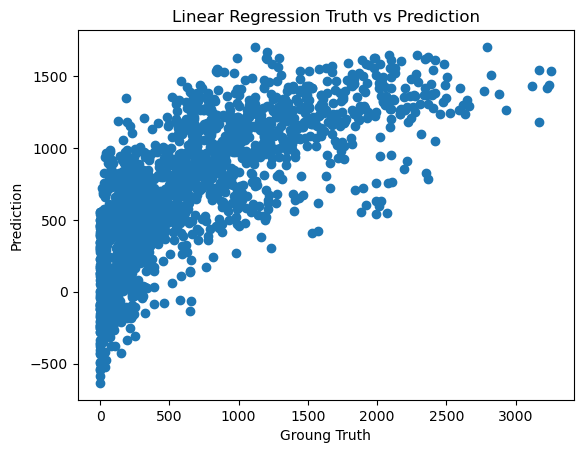

In [65]:
plt.scatter(y_test, y_pred)
plt.title("Linear Regression Truth vs Prediction")
plt.xlabel("Groung Truth")
plt.ylabel("Prediction")
plt.show()

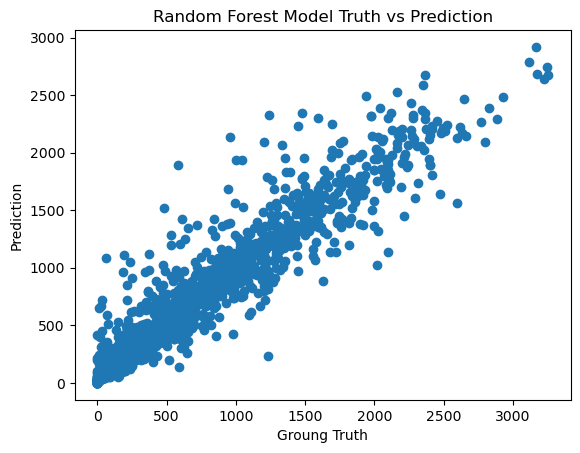

In [66]:
plt.scatter(y_test, y_pred_rfr)
plt.title("Random Forest Model Truth vs Prediction")
plt.xlabel("Groung Truth")
plt.ylabel("Prediction")
plt.show()

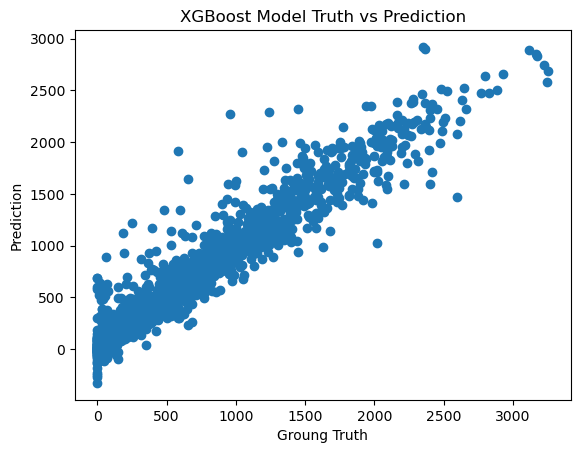

In [67]:
plt.scatter(y_test, y_pred_xgbr)
plt.title("XGBoost Model Truth vs Prediction")
plt.xlabel("Groung Truth")
plt.ylabel("Prediction")
plt.show()

## <font color='Blue'> Save ML Best Model </font>

In [68]:
import pickle
import os

dir = r"C://Users//Akshay//Documents//Project//Models"
model_file_name = "xgboost_regressor_r2_0_916_v1.pkl"

model_file_path = os.path.join(dir, model_file_name)
model_file_path

pickle.dump(xgbr, open(model_file_path, "wb"))   # wb :- Write Binary

In [69]:
X_test[0,:]

array([ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -1.21546253,  1.00873202,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
       -0.40559398, -0.41815465])

In [70]:
X_test[1,:]

array([-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94712104,  0.14077827,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
        2.4655198 , -0.41815465])

In [71]:
y_test

3859       0
5647    1213
6735    1391
374      292
5791    1130
        ... 
1992     195
930      316
5634    2405
3291     164
6416     721
Name: Rented Bike Count, Length: 1752, dtype: int64

## <font color='Blue'> Dump Scaling Parameters </font>

In [72]:
sc_dump_path = r"C:\Users\Akshay\Documents\Project\Models\sc.pkl"

pickle.dump(sc, open(sc_dump_path, "wb"))

# <font color='Lime'> Inference. </font>

## <font color='Blue'> Import Librabries. </font>

In [15]:
import pickle
import os
from datetime import datetime
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
model_path = r"C:\Users\Akshay\Documents\Project\Models\xgboost_regressor_r2_0_916_v1.pkl"
model = pickle.load(open(model_path, "rb"))   # rb :- Read Binary.

In [17]:
data = [
    [ 1.07807977,  0.22192612,  0.77468297,  1.82005277, -1.26200749,
       -0.25194272, -0.12916836, -0.17535463, -0.22754885, -5.47803337,
       -1.21546253,  1.00873202,  0.30459857,  1.74132735, -0.58152447,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
       -0.40559398, -0.41815465],
    [-0.65432992,  1.24504573,  0.23697162, -0.5001855 ,  0.56154562,
       -0.28664608, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        0.94712104,  0.14077827,  0.30459857, -0.57427456,  1.71961809,
       -0.57866842, -0.39840954, -0.40773843, -0.41815465, -0.40773843,
        2.4655198 , -0.41815465]
   
]


prediction = model.predict(data)
list(prediction)

[-134.08298, 1242.9778]

## <font color='Blue'> Load SC </font>

In [18]:
sc_dump_path = r"C:\Users\Akshay\Documents\Project\Models\sc.pkl"

sc = pickle.load(open(sc_dump_path, "rb"))

In [19]:
sc

StandardScaler()

## <font color='Blue'> User Input </font>

In [29]:
date = "15/06/2023"
hour = 18
temperature = 25
humidity = 55
wind_speed = 67
visibility = 80
solar_radiation = 0.0
rainfall = 0.0
snowfall = 0.2
seasons = "Winter"
holiday = "No Holiday"
functioning_day = "No"

## <font color='Blue'> Converting User Data into Model Consumable Format </font>

In [30]:
from datetime import datetime

holiday_dic = {"No Holiday" : 0, "Holiday" : 1}
functioning_day = {"No" : 0, "Yes" : 1}

holiday_dic["holiday"] = 0
functioning_day["functioning_day"] = 1

def get_string_to_datetime(date):
    dt = datetime.strptime(date, "%d/%m/%Y")
    return {"day":dt.day, "month":dt.month, "year":dt.year, "weekday":dt.strftime("%A")}

str_to_date = get_string_to_datetime(date)
str_to_date

{'day': 15, 'month': 6, 'year': 2023, 'weekday': 'Thursday'}

In [31]:
u_input_list = [hour, temperature, humidity, wind_speed, visibility, solar_radiation, rainfall, snowfall,
                holiday_dic.get('holiday'), functioning_day.get('functioning_day'),
                str_to_date["day"], str_to_date["month"], str_to_date["year"]]
                
features_name = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 
                 'Rainfall (mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day', 'Month', 'Year']

df_u_input = pd.DataFrame([u_input_list], columns = features_name)
df_u_input

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0    18               25           55                67                80   

   Solar Radiation (MJ/m2)  Rainfall (mm)  Snowfall (cm)  Holiday  \
0                      0.0            0.0            0.2        0   

   Functioning Day  Day  Month  Year  
0                1   15      6  2023

In [32]:
def season_to_df(seasons):   
    seasons_cols = ['Spring', 'Summer', 'Winter']
    seasons_data = np.zeros((1, len(seasons_cols)), dtype="int")

    df_seasons = pd.DataFrame(seasons_data, columns = seasons_cols)
    if seasons in seasons_cols:
        df_seasons[seasons]=1
    return df_seasons

df_season=season_to_df(seasons)
df_season

Spring  Summer  Winter
0       0       0       1

In [33]:
def days_df(weekday):
    days_names = ['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
    days_name_data = np.zeros((1, len(days_names)), dtype="int")
    
    df_days = pd.DataFrame(days_name_data, columns = days_names)
    
    if weekday in days_names:
        df_days[weekday]=1
        return df_days
    
df_days = days_df(str_to_date["weekday"])
df_days

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         0       0         1        0          0

In [34]:
['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Spring', 'Summer', 'Winter',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'Day',
 'Month',
 'Year',
 'Spring',
 'Summer',
 'Winter',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday']

In [35]:
df_for_pred = pd.concat([df_u_input, df_season, df_days], axis=1)
df_for_pred

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0    18               25           55                67                80   

   Solar Radiation (MJ/m2)  Rainfall (mm)  Snowfall (cm)  Holiday  \
0                      0.0            0.0            0.2        0   

   Functioning Day  ...  Year  Spring  Summer  Winter  Monday  Saturday  \
0                1  ...  2023       0       0       1       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         1        0          0  

[1 rows x 22 columns]

In [36]:
sc_data_for_pred = sc.transform(df_for_pred)
sc_data_for_pred

array([[ 0.93371229,  1.01214045, -0.15409119, 63.11301355, -2.24303289,
        -0.65681529, -0.12916836,  0.29083855, -0.22754885,  0.18254726,
        -0.07726065, -0.14853965, 18.24263884, -0.57427456, -0.58152447,
         1.72810536, -0.39840954, -0.40773843, -0.41815465,  2.45255275,
        -0.40559398, -0.41815465]])

## <font color='migenta'> Prediction in Deployment </font>

In [37]:
print(f"Rented Bike Demand on Date: {date}, and Time: {hour} is : {round(model.predict(sc_data_for_pred).tolist()[0])}")

Rented Bike Demand on Date: 15/06/2023, and Time: 18 is : 1610
